# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning Frameworks</font>

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


## Detecção de Objetos com GluonCV e YOLO

![title](dados/imagens/types.png)

Nosso objetivo nesta tarefa é implementar um detector de objetos em imagens usando uma rede pré-treinada do GluonCV, famosa pela precisão: YOLO (You Only Look Once). 

https://arxiv.org/pdf/1506.02640v5.pdf

https://pjreddie.com/darknet/yolo/

A detecção de objetos em imagens envolve duas tarefas: classificar o objeto na imagem e então criar a bounding box (caixa delimitadora) em volta doo objeto dentro da imagem.

GluonCV: https://gluon-cv.mxnet.io/

In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Instala o MxNet
!pip install -q mxnet gluoncv

In [4]:
# Imports
import mxnet as mx
import gluoncv as gcv
import matplotlib
import matplotlib.pyplot as plt

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

matplotlib 3.2.1
mxnet      1.6.0
gluoncv    0.7.0
Data Science Academy


In [6]:
# Carrega a imagem que queremos detectar objetos
imagem1 = mx.image.imread('dados/imagens/cachorro-bike1.jpeg')

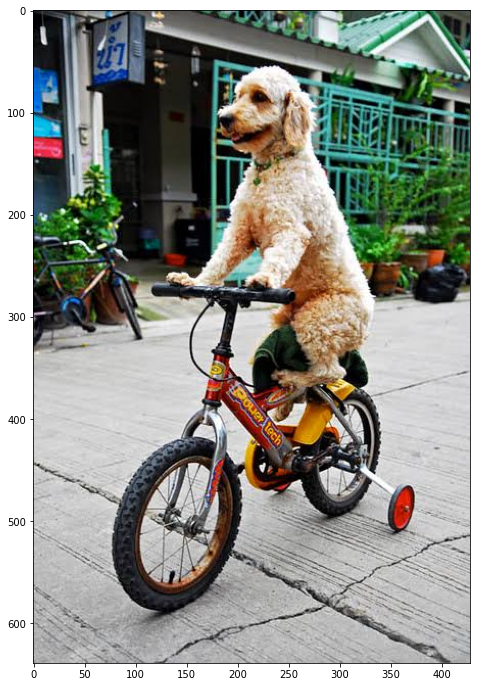

In [7]:
# Visualiza a imagem
plt.figure(figsize = (25,12))
plt.imshow(imagem1.asnumpy())

In [8]:
# Transformamos a imagem para o formato esperado pelo modelo YOLO
# https://gluon-cv.mxnet.io/api/data.transforms.html#gluoncv.data.transforms.presets.yolo.transform_test
imagem1_normalizada, imagem1_original = gcv.data.transforms.presets.yolo.transform_test(imagem1, short = 512)

In [9]:
# Como o modelo vai receber a imagem
imagem1_normalizada


[[[[-1.6041614  -1.6041614  -1.5870366  ... -0.8506721  -0.8506721
    -0.8506721 ]
   [-1.6041614  -1.5870366  -1.5870366  ... -0.8335474  -0.8335474
    -0.8335474 ]
   [-1.7925336  -1.7582842  -1.7411594  ... -0.78217316 -0.78217316
    -0.78217316]
   ...
   [ 0.34806067  0.41655967  0.57068247 ...  0.9131775   0.9131775
     0.9131775 ]
   [ 0.5878072   0.5193082   0.5364329  ...  0.86180323  0.86180323
     0.86180323]
   [ 0.96455175  0.7590547   0.5878072  ...  0.810429    0.810429
     0.810429  ]]

  [[-1.4929972  -1.4929972  -1.4754901  ... -0.635154   -0.635154
    -0.635154  ]
   [-1.4929972  -1.4754901  -1.4754901  ... -0.60014    -0.617647
    -0.60014   ]
   [-1.6680672  -1.6505601  -1.6330532  ... -0.547619   -0.547619
    -0.547619  ]
   ...
   [ 0.48529422  0.55532223  0.71288526 ...  1.0805323   1.0805323
     1.0805323 ]
   [ 0.7303922   0.6603642   0.6778712  ...  1.0280112   1.0280112
     1.0280112 ]
   [ 1.1155462   0.90546227  0.7303922  ...  0.9754903   0.97

In [10]:
# A imagem original
imagem1_original

array([[[ 30,  31,  33],
        [ 30,  31,  33],
        [ 31,  32,  34],
        ...,
        [ 74,  80,  76],
        [ 74,  80,  76],
        [ 74,  80,  76]],

       [[ 30,  31,  33],
        [ 31,  32,  34],
        [ 31,  32,  34],
        ...,
        [ 75,  82,  76],
        [ 75,  81,  77],
        [ 75,  82,  76]],

       [[ 19,  21,  23],
        [ 21,  22,  24],
        [ 22,  23,  25],
        ...,
        [ 78,  85,  78],
        [ 78,  85,  79],
        [ 78,  85,  77]],

       ...,

       [[144, 144, 144],
        [148, 148, 148],
        [157, 157, 157],
        ...,
        [177, 178, 180],
        [177, 178, 180],
        [177, 178, 180]],

       [[158, 158, 158],
        [154, 154, 154],
        [155, 155, 155],
        ...,
        [174, 175, 177],
        [174, 175, 177],
        [174, 175, 177]],

       [[180, 180, 180],
        [168, 168, 168],
        [158, 158, 158],
        ...,
        [171, 172, 174],
        [171, 172, 174],
        [171, 172, 174]]

In [11]:
# Carrega o modelo pré-treinado
# https://gluon-cv.mxnet.io/model_zoo/detection.html
modelo = gcv.model_zoo.get_model('yolo3_darknet53_coco', pretrained = True)

In [12]:
# Faz previsões com o modelo usando a imagem normalizada
previsoes_v1 = modelo(imagem1_normalizada)

In [13]:
# Previsões do modelo
previsoes_v1

(
 [[[16.]
   [ 1.]
   [ 1.]
   [58.]
   [ 3.]
   [58.]
   [24.]
   [58.]
   [77.]
   [26.]
   [58.]
   [29.]
   [58.]
   [58.]
   [58.]
   [58.]
   [39.]
   [58.]
   [62.]
   [58.]
   [32.]
   [58.]
   [58.]
   [58.]
   [58.]
   [58.]
   [58.]
   [ 1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]
   [-1.]]]
 <NDArray 1x100x1 @cpu(0)>,
 
 [[[ 0.9086037 ]
   [ 0.83952665]
   [ 0.7825148 ]
   [ 0.52984697

In [14]:
# Vamos verificar as dimensões do array usado para armazenar as previsões
for index, array in enumerate(previsoes_v1):
    print(index, ":", array.shape)

0 : (1, 100, 1)
1 : (1, 100, 1)
2 : (1, 100, 4)


In [15]:
# Usamos apenas o que está no índice 0
previsoes_v1 = [array[0] for array in previsoes_v1]

In [16]:
# Extraímos os índices, probabilidades e caixas delimitadoras
c_indices, c_prob, bounding_box = previsoes_v1

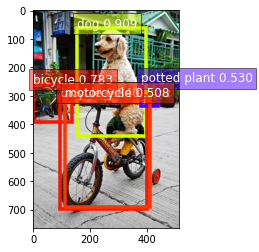

In [17]:
# Geramos a imagem com os objetos detectados
# Observer que usamos a imagem_original
gcv.utils.viz.plot_bbox(imagem1_original, bounding_box, c_prob, c_indices, class_names = modelo.classes)

In [18]:
# Lista de classes que podem ser previstas pelo modelo
modelo.classes

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

### Imagem 2

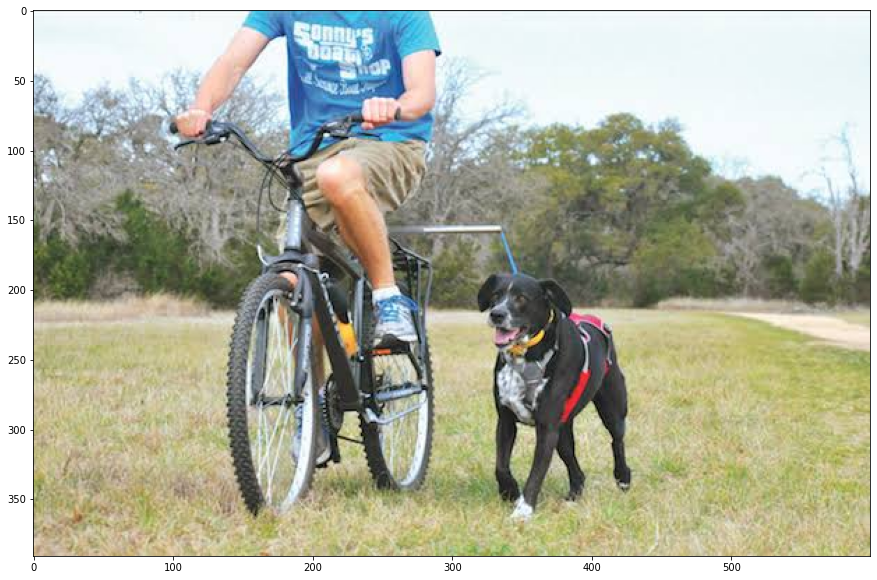

In [19]:
# Carrega a imagem que queremos detectar objetos
imagem2 = mx.image.imread('dados/imagens/cachorro-bike2.jpeg')

# Visualiza a imagem
plt.figure(figsize = (15,12))
plt.imshow(imagem2.asnumpy())

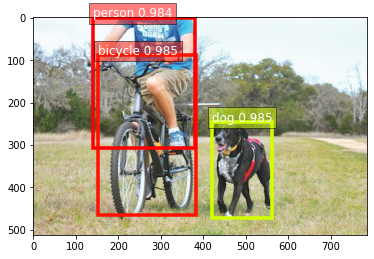

In [20]:
# Transformamos a imagem para o formato esperado pelo modelo YOLO
imagem2_normalizada, imagem2_original = gcv.data.transforms.presets.yolo.transform_test(imagem2, short = 512)

# Faz previsões com o modelo usando a imagem normalizada
previsoes_v2 = modelo(imagem2_normalizada)

# Usamos apenas o que está no índice 0
previsoes_v2 = [array[0] for array in previsoes_v2]

# Extraímos os índices, probabilidades e caixas delimitadoras
c_indices, c_prob, bounding_box = previsoes_v2

# Geramos a imagem com os objetos detectados
# Observer que usamos a imagem_original
gcv.utils.viz.plot_bbox(imagem2_original, bounding_box, c_prob, c_indices, class_names = modelo.classes)

### Imagem 3

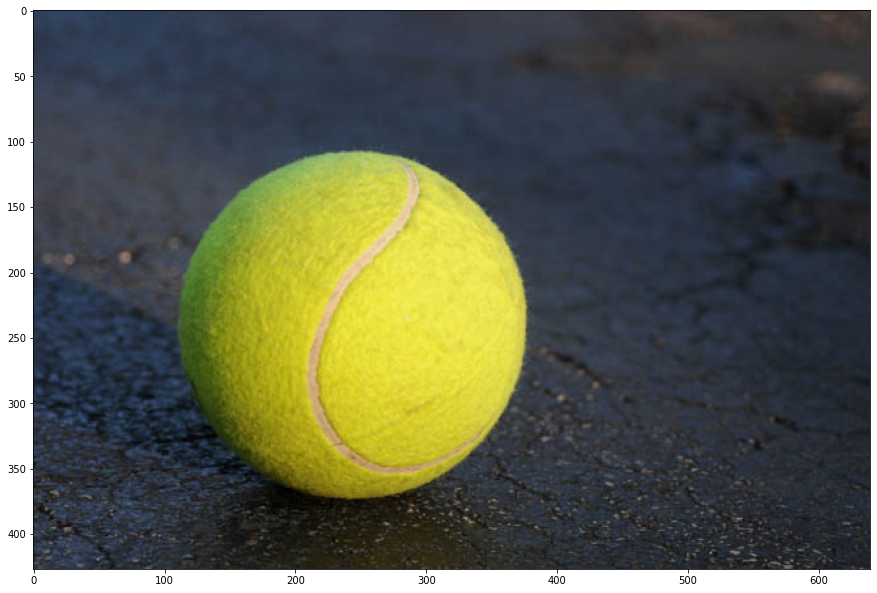

In [21]:
# Carrega a imagem que queremos detectar objetos
imagem3 = mx.image.imread('dados/imagens/imagem3.jpg')

# Visualiza a imagem
plt.figure(figsize = (15,12))
plt.imshow(imagem3.asnumpy())

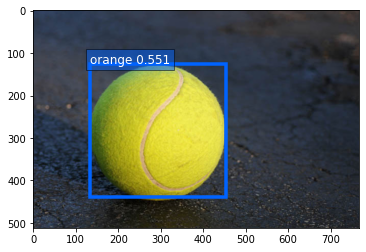

In [22]:
# Transformamos a imagem para o formato esperado pelo modelo YOLO
imagem3_normalizada, imagem3_original = gcv.data.transforms.presets.yolo.transform_test(imagem3, short = 512)

# Faz previsões com o modelo usando a imagem normalizada
previsoes_v3 = modelo(imagem3_normalizada)

# Usamos apenas o que está no índice 0
previsoes_v3 = [array[0] for array in previsoes_v3]

# Extraímos os índices, probabilidades e caixas delimitadoras
c_indices, c_prob, bounding_box = previsoes_v3

# Geramos a imagem com os objetos detectados
# Observer que usamos a imagem_original
gcv.utils.viz.plot_bbox(imagem3_original, bounding_box, c_prob, c_indices, class_names = modelo.classes)

![title](dados/imagens/meme.jpeg)

### Imagem 4

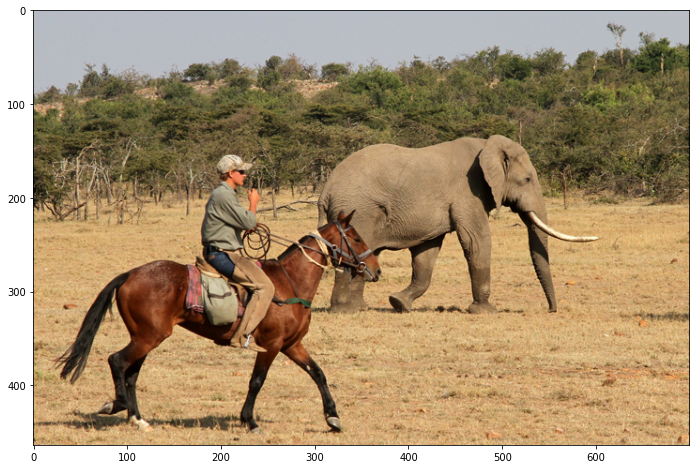

In [23]:
# Carrega a imagem que queremos detectar objetos
imagem4 = mx.image.imread('dados/imagens/elephant.jpg')

# Visualiza a imagem
plt.figure(figsize = (15,8))
plt.imshow(imagem4.asnumpy())

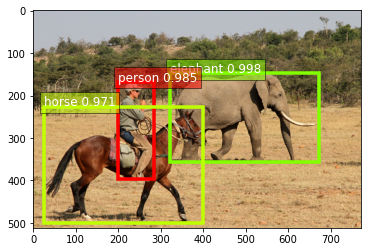

In [24]:
# Transformamos a imagem para o formato esperado pelo modelo YOLO
imagem4_normalizada, imagem4_original = gcv.data.transforms.presets.yolo.transform_test(imagem4, short = 512)

# Faz previsões com o modelo usando a imagem normalizada
previsoes_v4 = modelo(imagem4_normalizada)

# Usamos apenas o que está no índice 0
previsoes_v4 = [array[0] for array in previsoes_v4]

# Extraímos os índices, probabilidades e caixas delimitadoras
c_indices, c_prob, bounding_box = previsoes_v4

# Geramos a imagem com os objetos detectados
# Observer que usamos a imagem_original
gcv.utils.viz.plot_bbox(imagem4_original, bounding_box, c_prob, c_indices, class_names = modelo.classes)

### Imagem 5

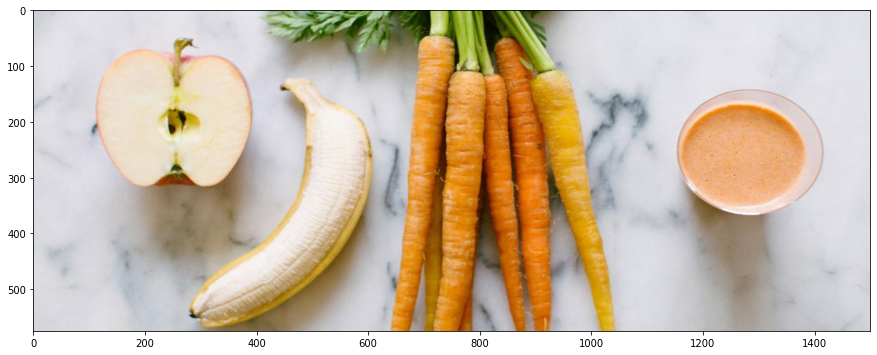

In [25]:
# Carrega a imagem que queremos detectar objetos
imagem5 = mx.image.imread('dados/imagens/frutas.jpg')

# Visualiza a imagem
plt.figure(figsize = (15,8))
plt.imshow(imagem5.asnumpy())

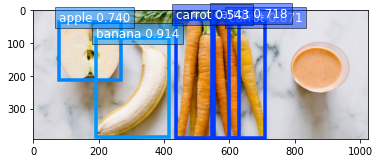

In [26]:
# Transformamos a imagem para o formato esperado pelo modelo YOLO
imagem5_normalizada, imagem5_original = gcv.data.transforms.presets.yolo.transform_test(imagem5, short = 512)

# Faz previsões com o modelo usando a imagem normalizada
previsoes_v5 = modelo(imagem5_normalizada)

# Usamos apenas o que está no índice 0
previsoes_v5 = [array[0] for array in previsoes_v5]

# Extraímos os índices, probabilidades e caixas delimitadoras
c_indices, c_prob, bounding_box = previsoes_v5

# Geramos a imagem com os objetos detectados
# Observer que usamos a imagem_original
gcv.utils.viz.plot_bbox(imagem5_original, bounding_box, c_prob, c_indices, class_names = modelo.classes)

# Fim